In [ ]:
import pandas as pd
from ast import literal_eval
import numpy as np
import re
import time

from tqdm import tqdm

from bs4 import BeautifulSoup as bs
import requests

import networkx as nx
from networkx.algorithms.bipartite import biadjacency_matrix

import nxviz as nv
import matplotlib.pyplot as plt
from netgraph import Graph
import dataframe_image as dfi

/root/venv/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# Add keywords

In [ ]:
def add_keywords_for_rg(df):
    keywords_column =[]
    for url in tqdm(df['url']):
        page = requests.get(url)
        soup = bs(page.text, "html.parser")
        keywords = soup.find("div", {"class": "PageArticleContent_relationBottom__N2VjE"})
        keywords_list = []
        try:
            for word in keywords:
                keywords_list.append(word.text.strip())
            keywords_column.append(keywords_list)
        except:
            keywords_column.append(keywords_list)

    df['keywords'] = keywords_column

    return df


def add_keywords_for_rbc(df):
    keywords_column =[]
    for url in tqdm(df['url']):
        page = requests.get(url)
        soup = bs(page.text, "html.parser")
        keywords = soup.find("div", {"class": "article__tags__container"})
        keywords_list = []
        try:
            for word in keywords:
                keywords_list.append(word.text.strip())
            # remove empty elements in list
            keywords_list = list(filter(None, keywords_list))
            keywords_column.append(keywords_list)
        except:
            keywords_column.append(keywords_list)
        time.sleep(1)

    df['keywords'] = keywords_column

    return df

In [ ]:
articles = pd.read_csv("/work/rg/2018/articles.csv")[['url', 'title', 'seendate']]
articles['seendate'] = pd.to_datetime(articles['seendate'], format='%Y%m%dT%H%M%SZ')
articles = articles.drop_duplicates()
articles

,url,title,seendate
0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,"Омича заподозрили в убийстве мамы , бабушки и ...",2018-02-09 13:00:00
1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,Алексей афаенко : оссийские военные совершил...,2018-02-14 19:45:00
2,https://rg.ru/2018/03/02/reg-sibfo/pochemu-kem...,Почему кемеровчанина поселили в интернат по до...,2018-03-02 05:15:00
3,https://rg.ru/2018/03/25/kogda-i-s-chem-idem-v...,Когда и с чем идем в Арктику оссийская газета,2018-03-25 09:00:00
4,https://rg.ru/2018/05/27/odnostoronnie-sankcii...,Односторонние санкции мешают развиваться нефтя...,2018-05-27 18:15:00
...,...,...,...
883,https://rg.ru/2018/12/29/reg-dfo/najden-eshche...,Найден еще один пострадавший при сходе лавины ...,2018-12-29 08:15:00
884,https://rg.ru/2018/12/29/kak-s-polzoj-vstretit...,Как с пользой встретить Новый год у телеэкрана,2018-12-29 06:45:00
885,https://rg.ru/2018/12/29/tver-zakon71-reg-dok....,Закон Тверской области от 28 декабря 2018 года...,2018-12-29 11:15:00
886,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Трамп назвал величайший обман в американской...,2018-12-30 15:15:00


In [ ]:
articles_with_keywords = add_keywords_for_rg(articles)
articles_with_keywords.to_csv("articles_with_keywords.csv")
articles_with_keywords

100%|██████████| 886/886 [06:42<00:00,  2.20it/s]


,url,title,seendate,keywords
0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,"Омича заподозрили в убийстве мамы , бабушки и ...",2018-02-09 13:00:00,"[Криминал, Следствие, Омск, Сибирь, В регионах]"
1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,Алексей афаенко : оссийские военные совершил...,2018-02-14 19:45:00,"[СМИ и соцсети, Военная операция РФ в Сирии]"
2,https://rg.ru/2018/03/02/reg-sibfo/pochemu-kem...,Почему кемеровчанина поселили в интернат по до...,2018-03-02 05:15:00,"[Соцзащита, Кемеровская область, Сибирь, В рег..."
3,https://rg.ru/2018/03/25/kogda-i-s-chem-idem-v...,Когда и с чем идем в Арктику оссийская газета,2018-03-25 09:00:00,"[Технологии, Наука]"
4,https://rg.ru/2018/05/27/odnostoronnie-sankcii...,Односторонние санкции мешают развиваться нефтя...,2018-05-27 18:15:00,"[Нефть и газ, ПМЭФ 2018, Петербургский междуна..."
...,...,...,...,...
883,https://rg.ru/2018/12/29/reg-dfo/najden-eshche...,Найден еще один пострадавший при сходе лавины ...,2018-12-29 08:15:00,"[Следствие, Стихийные бедствия, Хабаровский кр..."
884,https://rg.ru/2018/12/29/kak-s-polzoj-vstretit...,Как с пользой встретить Новый год у телеэкрана,2018-12-29 06:45:00,"[ТВ и сериалы, Кино и ТВ с Сусанной Альпериной..."
885,https://rg.ru/2018/12/29/tver-zakon71-reg-dok....,Закон Тверской области от 28 декабря 2018 года...,2018-12-29 11:15:00,[]
886,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Трамп назвал величайший обман в американской...,2018-12-30 15:15:00,"[США, Дональд Трамп, Выборы президента США-201..."


In [ ]:
articles_with_keywords = add_keywords_for_rbc(articles)
articles_with_keywords.to_csv("articles_with_keywords.csv")
articles_with_keywords

  2%|▏         | 16/886 [00:25<23:22,  1.61s/it]


KeyboardInterrupt: 

In [ ]:
articles_with_keywords = pd.read_csv("/work/rg/2018/articles_with_keywords.csv")
articles_with_keywords

,Unnamed: 0,url,title,seendate,keywords
0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,"Омича заподозрили в убийстве мамы , бабушки и ...",2018-02-09 13:00:00,"['Криминал', 'Следствие', 'Омск', 'Сибирь', 'В..."
1,1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,Алексей афаенко : оссийские военные совершил...,2018-02-14 19:45:00,"['СМИ и соцсети', 'Военная операция РФ в Сирии']"
2,2,https://rg.ru/2018/03/02/reg-sibfo/pochemu-kem...,Почему кемеровчанина поселили в интернат по до...,2018-03-02 05:15:00,"['Соцзащита', 'Кемеровская область', 'Сибирь',..."
3,3,https://rg.ru/2018/03/25/kogda-i-s-chem-idem-v...,Когда и с чем идем в Арктику оссийская газета,2018-03-25 09:00:00,"['Технологии', 'Наука']"
4,4,https://rg.ru/2018/05/27/odnostoronnie-sankcii...,Односторонние санкции мешают развиваться нефтя...,2018-05-27 18:15:00,"['Нефть и газ', 'ПМЭФ 2018', 'Петербургский ме..."
...,...,...,...,...,...
881,883,https://rg.ru/2018/12/29/reg-dfo/najden-eshche...,Найден еще один пострадавший при сходе лавины ...,2018-12-29 08:15:00,"['Следствие', 'Стихийные бедствия', 'Хабаровск..."
882,884,https://rg.ru/2018/12/29/kak-s-polzoj-vstretit...,Как с пользой встретить Новый год у телеэкрана,2018-12-29 06:45:00,"['ТВ и сериалы', 'Кино и ТВ с Сусанной Альпери..."
883,885,https://rg.ru/2018/12/29/tver-zakon71-reg-dok....,Закон Тверской области от 28 декабря 2018 года...,2018-12-29 11:15:00,[]
884,886,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Трамп назвал величайший обман в американской...,2018-12-30 15:15:00,"['США', 'Дональд Трамп', 'Выборы президента СШ..."


## Viz articles with keywords

In [ ]:
articles_with_keywords_viz = pd.read_csv("/work/rg_2022/articles_with_keywords.csv")[['seendate', 'url', 'title', 'keywords']][:6]
articles_with_keywords_viz['seendate'] = articles_with_keywords_viz['seendate'].str.slice(0,10)
articles_with_keywords_viz['url'] = articles_with_keywords_viz['url'].str.slice(0,19) + "..."
articles_with_keywords_viz['title'] = articles_with_keywords_viz['title'].str.slice(0,40) + "..."
dfi.export(articles_with_keywords_viz.style, "articles_with_keywords.png", table_conversion="matplotlib")
articles_with_keywords_viz.style

,seendate,url,title,keywords
0,2022-01-01,https://rg.ru/2022/...,Алтаец сорвался со скалы в Катунь во вре...,"['Несчастные случаи', 'Барнаул', 'Сибирь', 'В регионах']"
1,2022-01-01,https://rg.ru/2022/...,Он разрушал пластиковую красоту балетной...,"['Танец', 'РГ-Видео']"
2,2022-01-01,https://rg.ru/2022/...,Прыжок Ивана Грозного : Как Юрий Владими...,['Танец']
3,2022-01-02,https://rg.ru/2022/...,Путин назвал Григоровича патриархом росс...,"['Театр', 'Президент']"
4,2022-01-02,https://rg.ru/2022/...,Мишустин поздравил Григоровича с 95 - ле...,"['Театр', 'Председатель Правительства']"
5,2022-01-02,https://rg.ru/2022/...,Водитель разбившегося под Рязанью автобу...,"['ДТП', 'Рязанская область', 'Центральная Россия', 'В регионах']"


# Build bipartite connections

In [ ]:
def bipartite_connections(df):
    df = df[["url", "keywords"]]

    # remove empty keywords
    df = df[df.astype(str)["keywords"] != "[]"]

    # convert to list type
    df["keywords"] = df["keywords"].apply(literal_eval)
    # create row for each list element
    df = df.explode("keywords")

    df["index"] = df.index.tolist()

    print("Total keywords:", len(df["keywords"].unique()))

    return df


def viz_bipartite_from_df(df, n_rows=10):
    # df["index"] = df.index.tolist()
    edges = df[["index", "keywords"]][:n_rows].to_numpy()
    Graph(
        edges,
        node_layout="bipartite",
        node_size=0.5,
        node_labels=True,
        node_label_offset=0.1,
        edge_width=0.1,
    )
    plt.savefig('bipartite_connections.png')
    plt.show()


def get_top_keywords(df, n_words=10):
    return df['keywords'].value_counts()[:n_words]

In [ ]:
bipartite_connections = bipartite_connections(articles_with_keywords)
print(bipartite_connections["keywords"].unique())

bipartite_connections.to_csv("bipartite_connections.csv")

Total keywords: 549
['Криминал' 'Следствие' 'Омск' 'Сибирь' 'В регионах' 'СМИ и соцсети'
 'Военная операция РФ в Сирии' 'Соцзащита' 'Кемеровская область'
 'Технологии' 'Наука' 'Нефть и газ' 'ПМЭФ 2018'
 'Петербургский международный экономический форум' 'Санкции и антисанкции'
 'Литература' 'История' 'Минкультуры'
 'Книжный фестиваль "Красная площадь"' 'Товарищеские матчи'
 'Чемпионат мира по футболу - 2018'
 'Чемпионат мира по футболу в России. Спецпроект "РГ"'
 '#фото#бронетехника#Ливия' 'Внешняя политика' 'США' 'Финляндия'
 'Президент' 'Россия и США' 'РГ-Видео' 'РГ-Фото'
 '#Россия#происшествия#СССР#Владимир Этуш' 'Южная Корея' 'Промышленность'
 'Экология' 'Владивосток' 'Дальний Восток' 'Общественный транспорт'
 'Москва' 'Столица' 'Инфраструктура' 'Природа' 'АПК' 'ЯНАО'
 'Урал и Западная Сибирь' 'Казахстан' 'Утраты' 'Фигурное катание'
 '#Россия#происшествия#СССР' 'Великобритания' 'МИД'
 'Отравление Сергея Скрипаля' 'Кыргызстан'
 '#ракеты#гособоронзаказ#модернизация#ПТРК' 'Литва' 'След

In [ ]:
bipartite_connections

,url,keywords,index
0,https://rg.ru/2019/01/01/novyj-god-nachinaetsi...,Литература,0
1,https://rg.ru/2019/01/01/poroshenko-vozvel-v-r...,Украина,1
2,https://rg.ru/2019/01/01/basinskij-granin-i-so...,Литература,2
3,https://rg.ru/2019/01/02/putin-pozdravil-horeo...,Внутренняя политика,3
3,https://rg.ru/2019/01/02/putin-pozdravil-horeo...,Президент,3
...,...,...,...
2124,https://rg.ru/2019/12/31/kak-eto-bylo-v-noch-n...,История,2124
2124,https://rg.ru/2019/12/31/kak-eto-bylo-v-noch-n...,75-летие гимна России,2124
2127,https://rg.ru/2019/12/31/voinu-rossii-100-let....,История,2127
2128,https://rg.ru/2019/12/31/kak-varshava-pytaetsi...,Внешняя политика,2128


## Viz bipartite connections

In [0]:
bipartite_connections = pd.read_csv("/work/rg_2021/bipartite_connections.csv")
bipartite_connections

In [0]:
bipartite_connections_viz = pd.read_csv("/work/bipartite_connections.csv")[['index', 'keywords']][:7]
bipartite_connections_viz = bipartite_connections_viz.rename(columns = {'index': 'news'})
dfi.export(bipartite_connections_viz.style, "bipartite_connections_df.png", table_conversion="matplotlib")
bipartite_connections_viz.style

/root/venv/lib/python3.9/site-packages/netgraph/_node_layout.py:1157: UserWarning: The graph consistst of multiple components, and hence the partitioning into two subsets/layers is ambiguous!
Use the `subsets` argument to explicitly specify the desired partitioning.
  warnings.warn(msg)


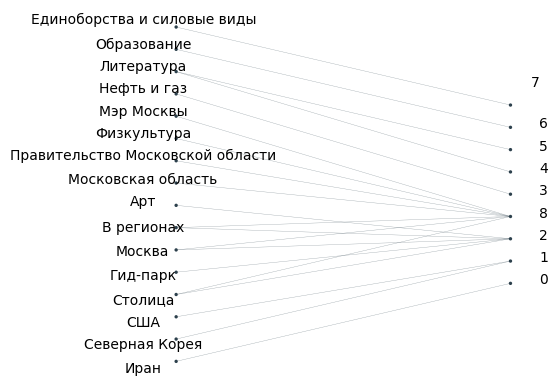

In [ ]:
viz_bipartite_from_df(bipartite_connections, 20)

# Filtre by towns and "РГ-"

In [ ]:
towns = pd.read_csv("https://raw.githubusercontent.com/epogrebnyak/ru-cities/main/assets/towns.csv")
towns.to_csv("towns.csv")

In [ ]:
towns = pd.read_csv("/work/towns.csv")[['city', 'region_name']]

city_list = towns["city"].unique()
region_list = towns["region_name"].unique()

print(city_list)
print(region_list)

['Алейск' 'Барнаул' 'Белокуриха' ... 'Тутаев' 'Углич' 'Ярославль']
['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Еврейская автономная область' 'Забайкальский край'
 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Карачаево-Черкесская Республика'
 'Кемеровская область - Кузбасс' 'Кировская область' 'Костромская область'
 'Краснодарский край' 'Красноярский край' 'Курганская область'
 'Курская область' 'Ленинградская область' 'Липецкая область'
 'Магаданская область' 'Москва' 'Московская область' 'Мурманская область'
 'Нижегородская область' 'Новгородская область' 'Новосибирская область'
 'Омская область' 'Оренбургская область' 'Орловская область'
 'Пензенская область' 'Пермский край' 'Приморский край'
 'Псковская область' '

In [ ]:
bipartite_connections = pd.read_csv("/work/rg/2018/bipartite_connections.csv")
bipartite_connections

,Unnamed: 0,url,keywords,index
0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Криминал,0
1,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Следствие,0
2,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Омск,0
3,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Сибирь,0
4,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,В регионах,0
...,...,...,...,...
2007,884,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Итоги 2018 года,884
2008,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,ТВ и сериалы,885
2009,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Кино и ТВ с Сусанной Альпериной,885
2010,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Что смотреть на ТВ в Новый год 2019,885


In [ ]:
bipartite_connections = bipartite_connections[~bipartite_connections['keywords'].isin(city_list)]
bipartite_connections

,Unnamed: 0,url,keywords,index
0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Криминал,0
1,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Следствие,0
3,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Сибирь,0
4,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,В регионах,0
5,1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,СМИ и соцсети,1
...,...,...,...,...
2007,884,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Итоги 2018 года,884
2008,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,ТВ и сериалы,885
2009,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Кино и ТВ с Сусанной Альпериной,885
2010,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Что смотреть на ТВ в Новый год 2019,885


In [ ]:
bipartite_connections = bipartite_connections[~bipartite_connections['keywords'].isin(region_list)]
bipartite_connections

,Unnamed: 0,url,keywords,index
0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Криминал,0
1,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Следствие,0
3,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Сибирь,0
4,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,В регионах,0
5,1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,СМИ и соцсети,1
...,...,...,...,...
2007,884,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Итоги 2018 года,884
2008,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,ТВ и сериалы,885
2009,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Кино и ТВ с Сусанной Альпериной,885
2010,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Что смотреть на ТВ в Новый год 2019,885


In [ ]:
bipartite_connections['keywords'] =  [re.sub(r'РГ-','', str(x)) for x in bipartite_connections['keywords']]

/tmp/ipykernel_170/2298905709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bipartite_connections['keywords'] =  [re.sub(r'РГ-','', str(x)) for x in bipartite_connections['keywords']]


In [ ]:
bipartite_connections.to_csv("bipartite_connections.csv")

In [ ]:
bipartite_connections

,Unnamed: 0,url,keywords,index
0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Криминал,0
1,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Следствие,0
3,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Сибирь,0
4,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,В регионах,0
5,1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,СМИ и соцсети,1
...,...,...,...,...
2007,884,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Итоги 2018 года,884
2008,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,ТВ и сериалы,885
2009,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Кино и ТВ с Сусанной Альпериной,885
2010,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Что смотреть на ТВ в Новый год 2019,885


In [ ]:
get_top_keywords(bipartite_connections, 15)

NameError: name 'get_top_keywords' is not defined

In [ ]:
top_keywords_viz = pd.DataFrame(get_top_keywords(bipartite_connections, 15))
top_keywords_viz.insert(0, 'index', top_keywords_viz.index.tolist())
# top_keywords_viz

top_keywords_viz.columns = ['keywords', 'counts']
# top_keywords_viz.index.name = 'keywords'

# top_keywords_viz = top_keywords_viz.reset_index(drop=True)
# dfi.export(top_keywords_viz.style, "top_keywords.png", table_conversion="matplotlib")
top_keywords_viz.style


TypeError: 'function' object is not subscriptable

# Get incidence matrix

In [ ]:
def bipartite_df_to_nx(df):
    edges = df[["index", "keywords"]].to_numpy()

    B = nx.Graph()
    B.add_nodes_from(df['keywords'], bipartite=0)
    B.add_nodes_from(df['index'], bipartite=1)
    B.add_edges_from(edges)

    print(B.edges(data=True))

    return B


def viz_bipartite_from_nx(B):
    fig, ax = plt.subplots(figsize=(7, 7))
    nv.circos(B, group_by="bipartite", node_color_by="bipartite")


def get_incidence_matrix(df):
    incidence_matrix = pd.DataFrame(0, index=df['index'].unique(), columns=df['keywords'].unique())
    for i,row in df.iterrows():
        incidence_matrix.at[row['index'], row['keywords']] = 1
    incidence_matrix.insert(0, 'news', incidence_matrix.index.tolist())
    return incidence_matrix

In [ ]:
bipartite_connections = pd.read_csv("/work/rg/2018/bipartite_connections.csv")
bipartite_connections

,Unnamed: 0,Unnamed: 0.1,url,keywords,index
0,0,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Криминал,0
1,1,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Следствие,0
2,3,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,Сибирь,0
3,4,0,https://rg.ru/2018/02/09/reg-sibfo/omicha-zapo...,В регионах,0
4,5,1,https://rg.ru/2018/02/14/aleksej-rafaenko-ross...,СМИ и соцсети,1
...,...,...,...,...,...
1799,2007,884,https://rg.ru/2018/12/30/tramp-nazval-velichaj...,Итоги 2018 года,884
1800,2008,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,ТВ и сериалы,885
1801,2009,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Кино и ТВ с Сусанной Альпериной,885
1802,2010,885,https://rg.ru/2018/12/31/chto-ne-propustit-po-...,Что смотреть на ТВ в Новый год 2019,885


In [ ]:
incidence_matrix = get_incidence_matrix(bipartite_connections)
incidence_matrix.to_csv("incidence_matrix.csv")

In [ ]:
incidence_matrix_viz = pd.read_csv("/work/incidence_matrix.csv").iloc[:7,1:8]
dfi.export(incidence_matrix_viz.style, "incidence_matrix.png", table_conversion="matplotlib")
incidence_matrix_viz.style

NameError: name 'pd' is not defined

[('Владимир Путин', 0, {}), ('Владимир Путин', 14, {}), ('Владимир Путин', 16, {}), ('Владимир Путин', 17, {}), ('Владимир Путин', 25, {}), ('Владимир Путин', 53, {}), ('Владимир Путин', 55, {}), ('Владимир Путин', 73, {}), ('Владимир Путин', 91, {}), ('Владимир Путин', 95, {}), ('Владимир Путин', 102, {}), ('Владимир Путин', 103, {}), ('Владимир Путин', 105, {}), ('Владимир Путин', 107, {}), ('Владимир Путин', 109, {}), ('Владимир Путин', 111, {}), ('Владимир Путин', 115, {}), ('Владимир Путин', 118, {}), ('Владимир Путин', 123, {}), ('Владимир Путин', 124, {}), ('Владимир Путин', 125, {}), ('Владимир Путин', 127, {}), ('Владимир Путин', 129, {}), ('Владимир Путин', 135, {}), ('Владимир Путин', 141, {}), ('Владимир Путин', 142, {}), ('Владимир Путин', 144, {}), ('Владимир Путин', 150, {}), ('Владимир Путин', 154, {}), ('Владимир Путин', 157, {}), ('Владимир Путин', 158, {}), ('Владимир Путин', 162, {}), ('Владимир Путин', 167, {}), ('Владимир Путин', 171, {}), ('Владимир Путин', 173, 

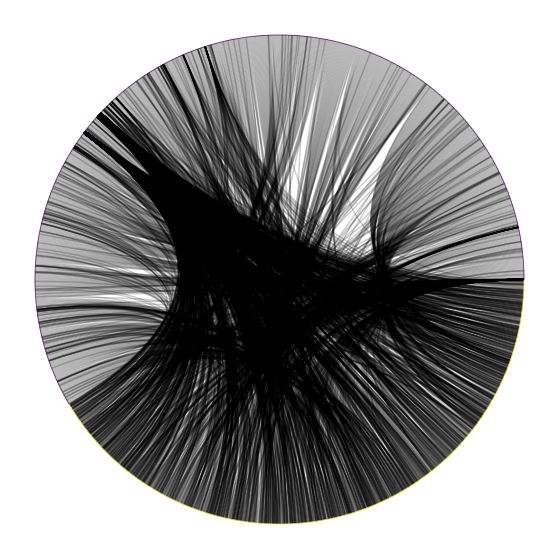

In [ ]:
B = bipartite_df_to_nx(bipartite_connections)
viz_bipartite_from_nx(B)

In [ ]:
print("bipartite: %s" % nx.is_bipartite(B))
# print("radius: %d" % nx.radius(B))
# print("diameter: %d" % nx.diameter(B))
# print("eccentricity: %s" % nx.eccentricity(B))
# print("center: %s" % nx.center(B))
# print("periphery: %s" % nx.periphery(B))
print("density: %s" % nx.density(B))

bipartite: True
density: 0.002653206893035587


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d79deab-c9c6-414b-8803-1e385542ff1f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>